In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dc_data = pd.read_csv("dc-wikia-data.csv")

In [3]:
dc_data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [4]:
# Drop the urlslug column
dc_data.drop("urlslug", inplace=True, axis=1)

In [5]:
# Delete GSM column
dc_data.drop("GSM", inplace=True, axis=1)

In [6]:
dc_data.dropna(inplace=True)

In [7]:
dc_data["Year"] = dc_data["YEAR"].astype("int")

## 1. Compare the number of male characters to the number of female characters on a countplot

In [8]:
data = dc_data[(dc_data["SEX"] != "Agender Characters") & (dc_data["SEX"] != "Genderfluid Characters") & (dc_data["SEX"] != "Genderless Characters")]

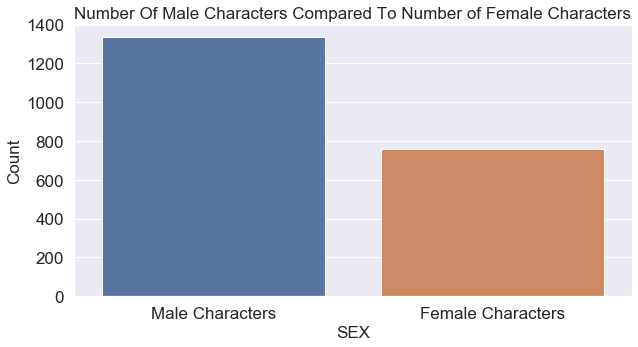

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
ax= sns.countplot(data=data, x="SEX")
ax.set_title("Number Of Male Characters Compared To Number of Female Characters", fontsize=17)
plt.xlabel("SEX", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.yticks(size=17)
plt.xticks(size=17)
plt.show()

## 2. Compare the number of times Male Characters appeared in comics to the number of times Female Characters appeared in comics

In [10]:
data_appearances = data.groupby("SEX")["APPEARANCES"].agg([sum])

In [11]:
data_appearances.reset_index(inplace=True)

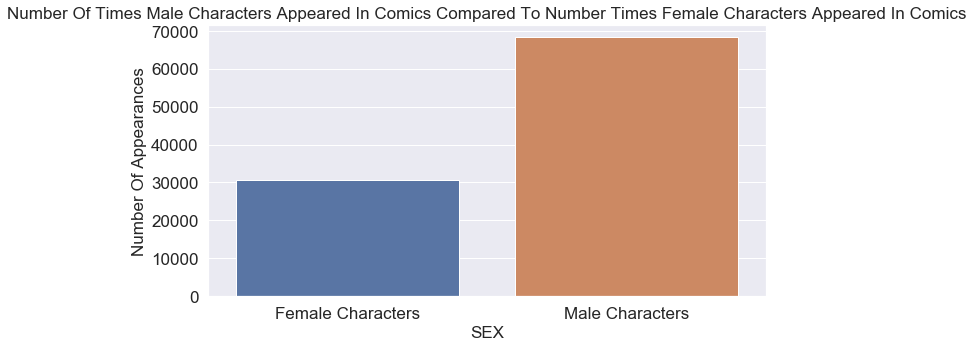

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
ax= sns.barplot(x="SEX", y="sum", data=data_appearances)
ax.set_title("Number Of Times Male Characters Appeared In Comics Compared To Number Times " 
             "Female Characters Appeared In Comics", fontsize=17)
plt.xlabel("SEX", fontsize=17)
plt.ylabel("Number Of Appearances", fontsize=17)
plt.yticks(size=17)
plt.xticks(size=17)
plt.show()

## 3. Figure out if the first 10 appearances were Male Characters or Female Characters. If the gender was mixed, figure out which gender dominated for the first 10 appearances

In [13]:
first_10_appearances = data.sort_values(by="YEAR").head(10)

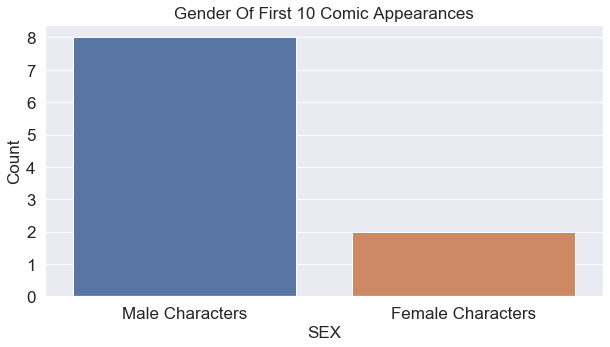

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
ax= sns.countplot(data=first_10_appearances, x="SEX")
ax.set_title("Gender Of First 10 Comic Appearances", fontsize=17)
plt.xlabel("SEX", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.yticks(size=17)
plt.xticks(size=17)
plt.show()

## 4. Display How The Appearances in Comics for the 2 genders progressed throughout the years

In [15]:
appearances_years = data.groupby(["SEX", "Year"])["APPEARANCES"].agg([sum])

In [16]:
appearances_years.reset_index(inplace=True)

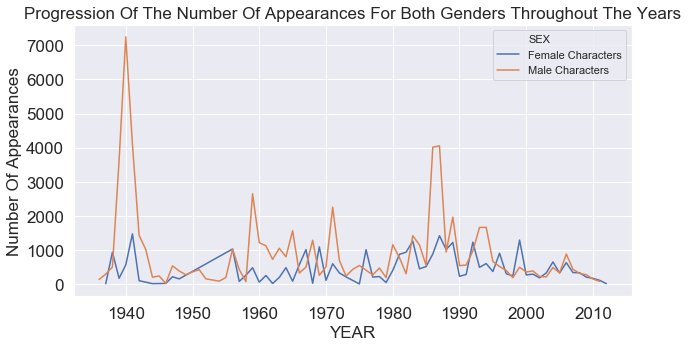

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
ax=  sns.lineplot(x="Year", y="sum", hue="SEX", data=appearances_years)
ax.set_title("Progression Of The Number Of Appearances For Both Genders Throughout The Years", fontsize=17)
plt.xlabel("YEAR", fontsize=17)
plt.ylabel("Number Of Appearances", fontsize=17)
plt.yticks(size=17)
plt.xticks(size=17)
plt.show()

## 5. Check the ALIGN attribute for both sexes

In [18]:
character_portrayance = data.groupby(["ALIGN", "SEX"]).count()

In [19]:
character_portrayance = character_portrayance.add_suffix("_Count")

In [20]:
character_portrayance.drop(character_portrayance.columns.difference(["page_id_Count"]), 1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [21]:
character_portrayance.rename(columns={"page_id_Count":"Count"}, inplace=True)

In [22]:
character_portrayance_2 = character_portrayance.reset_index()

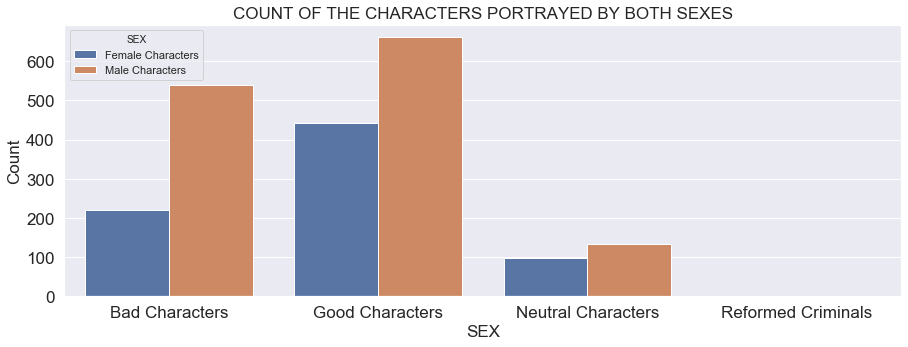

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize = (15,5))
ax= sns.barplot(x="ALIGN", y="Count", hue="SEX", data=character_portrayance_2)
ax.set_title("COUNT OF THE CHARACTERS PORTRAYED BY BOTH SEXES", fontsize=17)
plt.xlabel("SEX", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.yticks(size=17)
plt.xticks(size=17)
plt.show()

## Conclusion

### Male Characters dominate in the DC Comics compared to Female Characters